# Noise2Noise
#### Learning Image Restoration without Clean Data

### Preprocesamiento

In [2]:
## PREPROCESAMIENTO

### Modelado

In [3]:
from keras import Input, Model
from keras import layers

In [4]:
from keras import backend as K
K.clear_session()

In [5]:
# Modelo Base

In [6]:
input_img = Input(shape=(256, 256, 3))

In [7]:
# ENCODER
conv_1_a = layers.Conv2D(48, (2, 2), padding='same', use_bias=True)(input_img)
l_relu_1_a = layers.LeakyReLU()(conv_1_a)
conv_1_b = layers.Conv2D(48, (2, 2), padding='same', use_bias=True)(l_relu_1_a)
l_relu_1_b = layers.LeakyReLU()(conv_1_b)
maxpool_1 = layers.MaxPooling2D((2, 2), padding='same')(l_relu_1_b)

conv_2 = layers.Conv2D(48, (2, 2), padding='same', use_bias=True)(maxpool_1)
l_relu_2 = layers.LeakyReLU()(conv_2)
maxpool_2 = layers.MaxPooling2D((2, 2), padding='same')(l_relu_2)

conv_3 = layers.Conv2D(48, (2, 2), padding='same', use_bias=True)(maxpool_2)
l_relu_3 = layers.LeakyReLU()(conv_3)
maxpool_3 = layers.MaxPooling2D((2, 2), padding='same')(l_relu_3)

conv_4 = layers.Conv2D(48, (2, 2), padding='same', use_bias=True)(maxpool_3)
l_relu_4 = layers.LeakyReLU()(conv_4)
maxpool_4 = layers.MaxPooling2D((2, 2), padding='same')(l_relu_4)

conv_5_a = layers.Conv2D(48, (2, 2), padding='same', use_bias=True)(maxpool_4)
l_relu_5_a = layers.LeakyReLU()(conv_5_a)
maxpool_5 = layers.MaxPooling2D((2, 2), padding='same')(l_relu_5_a)
conv_5_b = layers.Conv2D(48, (2, 2), padding='same', use_bias=True)(maxpool_5)
encoded = layers.LeakyReLU()(conv_5_b)


In [8]:
# DECODER

upsamp_6 = layers.UpSampling2D((2, 2))(encoded)
conv_6_a = layers.Conv2D(96, (2, 2), padding='same', use_bias=True)(upsamp_6)
l_relu_6_a = layers.LeakyReLU()(conv_6_a)
conv_6_b = layers.Conv2D(96, (2, 2), padding='same', use_bias=True)(l_relu_6_a)
l_relu_6_b = layers.LeakyReLU()(conv_6_b)

upsamp_7 = layers.UpSampling2D((2, 2))(l_relu_6_b)
conv_7_a = layers.Conv2D(96, (2, 2), padding='same', use_bias=True)(upsamp_7)
l_relu_7_a = layers.LeakyReLU()(conv_7_a)
conv_7_b = layers.Conv2D(96, (2, 2), padding='same', use_bias=True)(l_relu_7_a)
l_relu_7_b = layers.LeakyReLU()(conv_7_b)

upsamp_8 = layers.UpSampling2D((2, 2))(l_relu_7_b)
conv_8_a = layers.Conv2D(96, (2, 2), padding='same', use_bias=True)(upsamp_8)
l_relu_8_a = layers.LeakyReLU()(conv_8_a)
conv_8_b = layers.Conv2D(96, (2, 2), padding='same', use_bias=True)(l_relu_8_a)
l_relu_8_b = layers.LeakyReLU()(conv_8_b)

upsamp_9 = layers.UpSampling2D((2, 2))(l_relu_8_b)
conv_9_a = layers.Conv2D(96, (2, 2), padding='same', use_bias=True)(upsamp_9)
l_relu_9_a = layers.LeakyReLU()(conv_9_a)
conv_9_b = layers.Conv2D(96, (2, 2), padding='same', use_bias=True)(l_relu_9_a)
l_relu_9_b = layers.LeakyReLU()(conv_9_b)

upsamp_10 = layers.UpSampling2D((2, 2))(l_relu_9_b)
conv_10_a = layers.Conv2D(64, (2, 2), padding='same', use_bias=True)(upsamp_10)
l_relu_10_a = layers.LeakyReLU()(conv_10_a)
conv_10_b = layers.Conv2D(32, (2, 2), padding='same', use_bias=True)(l_relu_10_a)
l_relu_10_b = layers.LeakyReLU()(conv_10_b)

decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(l_relu_10_b)


In [9]:
autoencoder = Model(input_img, decoded)

In [10]:
autoencoder.compile(optimizer="adam", loss="mse", metrics=["acc"])

In [11]:
from tensorflow.keras.utils import plot_model

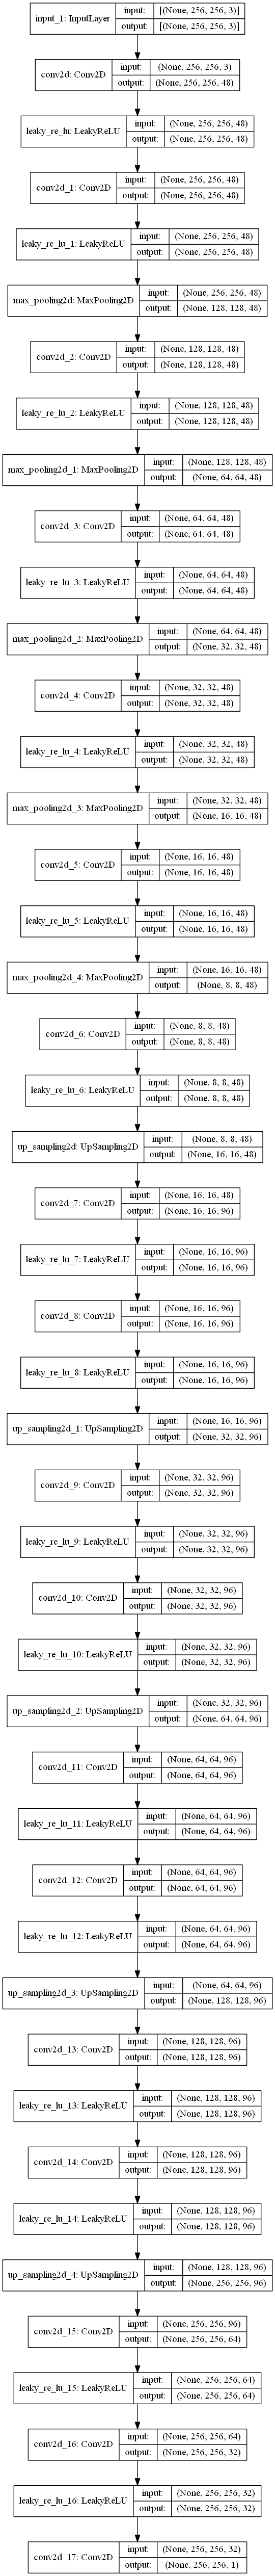

In [15]:
plot_model(autoencoder,show_shapes=True)

In [12]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 48)      624       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 256, 256, 48)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 48)      9264      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256, 256, 48)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 48)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 48)      9264  

In [ ]:
# EXPERIMENTACION CON VARIACIONES AL MODELO BASE

### RESULTADOS

In [ ]:
## RESULTADOS